<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/Computer_vision_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
#importing libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K


In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "VGG_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Reading the Folders 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir(path='.')

def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName)
    allFiles = list()
    
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


dirName = '/content/drive/MyDrive/training'

listOfFiles = getListOfFiles(dirName)


listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]


for i in listOfFiles:
    print(i)    

/content/drive/MyDrive/training/3/103.png
/content/drive/MyDrive/training/3/104.png
/content/drive/MyDrive/training/3/127.png
/content/drive/MyDrive/training/3/116.png
/content/drive/MyDrive/training/3/109.png
/content/drive/MyDrive/training/3/105.png
/content/drive/MyDrive/training/3/130.png
/content/drive/MyDrive/training/3/1.png
/content/drive/MyDrive/training/3/101.png
/content/drive/MyDrive/training/3/119.png
/content/drive/MyDrive/training/3/117.png
/content/drive/MyDrive/training/3/107.png
/content/drive/MyDrive/training/3/125.png
/content/drive/MyDrive/training/3/124.png
/content/drive/MyDrive/training/3/13.png
/content/drive/MyDrive/training/3/126.png
/content/drive/MyDrive/training/3/10.png
/content/drive/MyDrive/training/3/108.png
/content/drive/MyDrive/training/3/177.png
/content/drive/MyDrive/training/3/168.png
/content/drive/MyDrive/training/3/178.png
/content/drive/MyDrive/training/3/175.png
/content/drive/MyDrive/training/3/174.png
/content/drive/MyDrive/training/3/131.

In [ ]:
#certain 4 folders
folder_names = ["1", "2", "3", "4","6"]
listOfFiles = [f for f in listOfFiles if any([n in f for n in folder_names])]
print(listOfFiles)

['/content/drive/MyDrive/training/3/103.png', '/content/drive/MyDrive/training/3/104.png', '/content/drive/MyDrive/training/3/127.png', '/content/drive/MyDrive/training/3/116.png', '/content/drive/MyDrive/training/3/109.png', '/content/drive/MyDrive/training/3/105.png', '/content/drive/MyDrive/training/3/130.png', '/content/drive/MyDrive/training/3/1.png', '/content/drive/MyDrive/training/3/101.png', '/content/drive/MyDrive/training/3/119.png', '/content/drive/MyDrive/training/3/117.png', '/content/drive/MyDrive/training/3/107.png', '/content/drive/MyDrive/training/3/125.png', '/content/drive/MyDrive/training/3/124.png', '/content/drive/MyDrive/training/3/13.png', '/content/drive/MyDrive/training/3/126.png', '/content/drive/MyDrive/training/3/10.png', '/content/drive/MyDrive/training/3/108.png', '/content/drive/MyDrive/training/3/177.png', '/content/drive/MyDrive/training/3/168.png', '/content/drive/MyDrive/training/3/178.png', '/content/drive/MyDrive/training/3/175.png', '/content/dri

In [ ]:
# Read the images 
img = [io.imread(file) for file in listOfFiles]

(93, 93, 3)

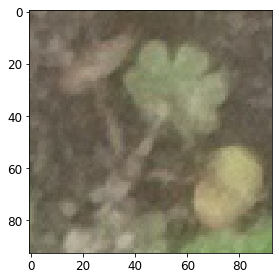

In [ ]:
io.imshow(img[0])
img[0].shape

# change size 


In [ ]:
img=np.array(img)
img.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(900,)

In [ ]:
# Resize the images
from skimage.transform import resize
new_img=[]
for i in img:
    new_img.append(resize(i,(32,32)))

In [ ]:
new_img=np.array(new_img)
new_img.shape

(900, 32, 32, 3)

In [ ]:
np.shape(listOfFiles)

(900,)

In [ ]:
#"1", "2", "3", "4","6"
#Preparing label for multiclass
ymultclass = []
for f in listOfFiles:
    if '/1/' in f:
        ymultclass.append('0')
    if '/2/' in f:
        ymultclass.append('1')
    if '/3/' in f:
        ymultclass.append('2')
    if '/4/' in f:
        ymultclass.append('3')
    if '/6/' in f:
        ymultclass.append('4')              

In [ ]:
ymultclass=np.array(ymultclass)
ymultclass.shape

(900,)

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model.layers[-13].output
x = Flatten()(x)
#x = Dense(10, activation='softmax')(x)
#x = MaxPooling2D(pool_size=(8, 8))(x)
#x = Conv2D(256, (1, 1),activation='relu')(x)
x = Dense(2000, activation='relu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(250, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer_classification = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer_classification.summary())

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [ ]:
# split the data in training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(new_img,ymultclass, train_size=0.8, random_state=42)


In [ ]:
nClasses = 5
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_valid_k = tensorflow.keras.utils.to_categorical(y_valid, num_classes=nClasses)


In [ ]:
for i in range(0,200,20):
    print(y_train[i], " ", y_train_k[i,:])

2   [0. 0. 1. 0. 0.]
4   [0. 0. 0. 0. 1.]
2   [0. 0. 1. 0. 0.]
4   [0. 0. 0. 0. 1.]
3   [0. 0. 0. 1. 0.]
1   [0. 1. 0. 0. 0.]
3   [0. 0. 0. 1. 0.]
1   [0. 1. 0. 0. 0.]
1   [0. 1. 0. 0. 0.]
1   [0. 1. 0. 0. 0.]


In [ ]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer_classification.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer_classification.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid_k))

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


6/6 [==============================] - 5s 813ms/step - loss: 17.6387 - accuracy: 0.1931 - val_loss: 3.8050 - val_accuracy: 0.2056
Epoch 2/32
6/6 [==============================] - 4s 762ms/step - loss: 3.3612 - accuracy: 0.2583 - val_loss: 2.2696 - val_accuracy: 0.2000
Epoch 3/32
6/6 [==============================] - 4s 755ms/step - loss: 1.9647 - accuracy: 0.2972 - val_loss: 2.0294 - val_accuracy: 0.2889
Epoch 4/32
6/6 [==============================] - 5s 772ms/step - loss: 1.5947 - accuracy: 0.3639 - val_loss: 2.1210 - val_accuracy: 0.2333
Epoch 5/32
6/6 [==============================] - 4s 764ms/step - loss: 1.3232 - accuracy: 0.4694 - val_loss: 2.1297 - val_accuracy: 0.3056
Epoch 6/32
6/6 [==============================] - 4s 761ms/step - loss: 1.2607 - accuracy: 0.4986 - val_loss: 2.0096 - val_accuracy: 0.2222
Epoch 7/32
6/6 [==============================] - 4s 760ms/step - loss: 1.0182 - accuracy: 0.5903 - val_loss: 2.0298 - val_accuracy: 0.2833
Epoch 8/32
6/6 [==============

In [ ]:
y_predict_prob = vgg_model_transfer_classification.predict(X_valid)
y_predict = y_predict_prob.argmax(axis=-1)
y_valid=y_valid.astype(int)

# **Give the confusion matrix of your network on the training including validation**



In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[17  6  3  3  2]
 [ 8 10  5  8  7]
 [ 9 10  1  9  6]
 [ 2  8  6 18  7]
 [ 1  3  5  8 18]]


discussion : the model has bad prediction in both class 3 and bias in class no 4 to class no 6 

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


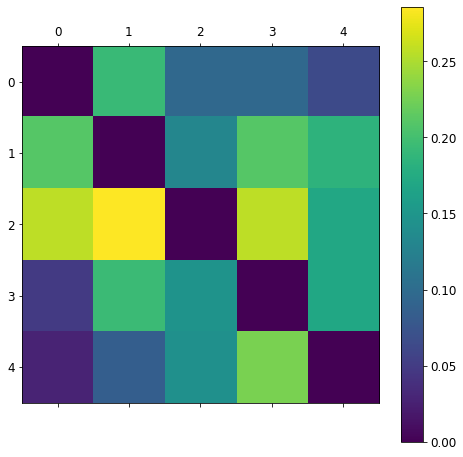

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

# **Give the confusion matrix of your network on the training including testing**

In [ ]:
os.listdir(path='.')

def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName)
    allFiles = list()
    
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


dirName = '/content/drive/MyDrive/testing'

listOfFiles = getListOfFiles(dirName)


listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]


for i in listOfFiles:
    print(i)    

/content/drive/MyDrive/testing/6/285.png
/content/drive/MyDrive/testing/6/276.png
/content/drive/MyDrive/testing/6/267.png
/content/drive/MyDrive/testing/6/274.png
/content/drive/MyDrive/testing/6/283.png
/content/drive/MyDrive/testing/6/273.png
/content/drive/MyDrive/testing/6/263.png
/content/drive/MyDrive/testing/6/281.png
/content/drive/MyDrive/testing/6/275.png
/content/drive/MyDrive/testing/6/268.png
/content/drive/MyDrive/testing/6/272.png
/content/drive/MyDrive/testing/6/280.png
/content/drive/MyDrive/testing/6/270.png
/content/drive/MyDrive/testing/6/269.png
/content/drive/MyDrive/testing/6/277.png
/content/drive/MyDrive/testing/6/264.png
/content/drive/MyDrive/testing/6/282.png
/content/drive/MyDrive/testing/6/266.png
/content/drive/MyDrive/testing/6/265.png
/content/drive/MyDrive/testing/6/278.png
/content/drive/MyDrive/testing/1/305.png
/content/drive/MyDrive/testing/1/286.png
/content/drive/MyDrive/testing/1/289.png
/content/drive/MyDrive/testing/1/311.png
/content/drive/M

In [ ]:
#certain 4 folders
folder_names = ["1", "2", "3", "4","6"]
listOfFiles = [f for f in listOfFiles if any([n in f for n in folder_names])]
print(listOfFiles)

['/content/drive/MyDrive/testing/6/285.png', '/content/drive/MyDrive/testing/6/276.png', '/content/drive/MyDrive/testing/6/267.png', '/content/drive/MyDrive/testing/6/274.png', '/content/drive/MyDrive/testing/6/283.png', '/content/drive/MyDrive/testing/6/273.png', '/content/drive/MyDrive/testing/6/263.png', '/content/drive/MyDrive/testing/6/281.png', '/content/drive/MyDrive/testing/6/275.png', '/content/drive/MyDrive/testing/6/268.png', '/content/drive/MyDrive/testing/6/272.png', '/content/drive/MyDrive/testing/6/280.png', '/content/drive/MyDrive/testing/6/270.png', '/content/drive/MyDrive/testing/6/269.png', '/content/drive/MyDrive/testing/6/277.png', '/content/drive/MyDrive/testing/6/264.png', '/content/drive/MyDrive/testing/6/282.png', '/content/drive/MyDrive/testing/6/266.png', '/content/drive/MyDrive/testing/6/265.png', '/content/drive/MyDrive/testing/6/278.png', '/content/drive/MyDrive/testing/1/305.png', '/content/drive/MyDrive/testing/1/286.png', '/content/drive/MyDrive/testing

In [ ]:
# Read the images 
img = [io.imread(file) for file in listOfFiles]

In [ ]:
# Resize the images
from skimage.transform import resize
new_img_test=[]
for i in img:
    new_img_test.append(resize(i,(32,32)))

In [ ]:
new_img_test=np.array(new_img_test)
new_img_test.shape

(100, 32, 32, 3)

In [ ]:
#"1", "2", "3", "4","6"
#Preparing label for multiclass
ymultclass_test = []
for f in listOfFiles:
    if '/1/' in f:
        ymultclass_test.append('0')
    if '/2/' in f:
        ymultclass_test.append('1')
    if '/3/' in f:
        ymultclass_test.append('2')
    if '/4/' in f:
        ymultclass_test.append('3')
    if '/6/' in f:
        ymultclass_test.append('4')   

In [ ]:
ymultclass_test=np.array(ymultclass_test)
ymultclass_test.shape

(100,)

In [ ]:
y_predict_prob_test = vgg_model_transfer_classification.predict(new_img_test)

In [ ]:
y_predict_test = y_predict_prob_test .argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(ymultclass_test.astype(int), y_predict_test)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[14  3  1  2  0]
 [ 5 10  2  3  0]
 [ 1  8  1  5  5]
 [ 2  2  0  9  7]
 [ 2  3  3  6  6]]


discussion : the model has bad prediction in both class 4 ,6, 3 and bias in class 1 to class 2  and class 4

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


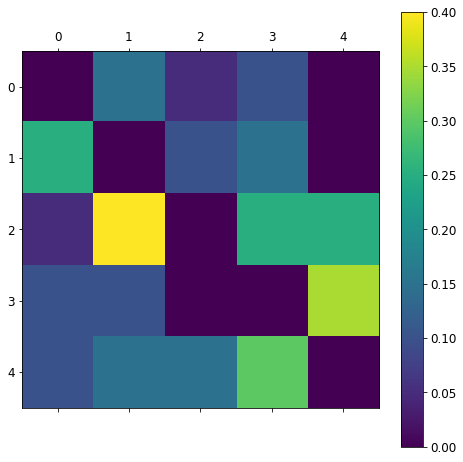

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

#  print your learning curves for training and validation 

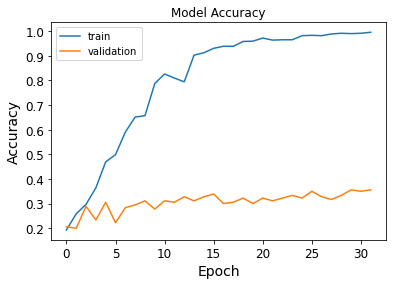

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

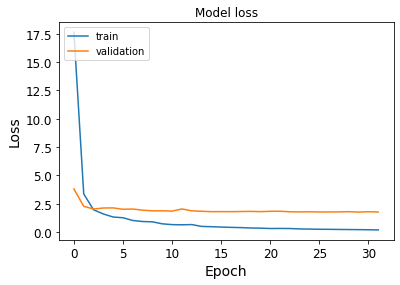

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Classificatio discussion : OVERFITTING HAPPENED AS THE ACCURACY IS HIGH IN TRAINGING DATA AND IN CASE OF NEW DATA IN validation ACCURACY DECREASE AS NO OF EPOCHES INCREASE as shown in learning curve **

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ymultclass_test.astype(int), np.round(y_predict_test)))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.38      0.50      0.43        20
           2       0.14      0.05      0.07        20
           3       0.36      0.45      0.40        20
           4       0.33      0.30      0.32        20

    accuracy                           0.40       100
   macro avg       0.36      0.40      0.37       100
weighted avg       0.36      0.40      0.37       100



# **Regression Network**

In [ ]:
import keras.layers
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model.layers[-13].output
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation=keras.layers.LeakyReLU(alpha=0.3))(x)


from tensorflow.keras.models import Model
vgg_model_transfer_regression = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer_regression.summary())

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [ ]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
vgg_model_transfer_regression.compile(loss='mse', 
                           optimizer="adam",
                           metrics=['mse'])

In [ ]:
y_train=y_train.astype(int)


In [ ]:

history = vgg_model_transfer_regression.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid))

Epoch 1/32
6/6 [==============================] - 5s 698ms/step - loss: 494.5079 - mse: 494.5079 - val_loss: 10.7440 - val_mse: 10.7440
Epoch 2/32
6/6 [==============================] - 4s 672ms/step - loss: 10.1009 - mse: 10.1009 - val_loss: 10.4015 - val_mse: 10.4015
Epoch 3/32
6/6 [==============================] - 4s 676ms/step - loss: 7.6938 - mse: 7.6938 - val_loss: 6.8847 - val_mse: 6.8847
Epoch 4/32
6/6 [==============================] - 4s 674ms/step - loss: 6.3673 - mse: 6.3673 - val_loss: 5.3827 - val_mse: 5.3827
Epoch 5/32
6/6 [==============================] - 4s 670ms/step - loss: 3.8246 - mse: 3.8246 - val_loss: 4.1279 - val_mse: 4.1279
Epoch 6/32
6/6 [==============================] - 4s 669ms/step - loss: 3.1214 - mse: 3.1214 - val_loss: 2.8349 - val_mse: 2.8349
Epoch 7/32
6/6 [==============================] - 4s 675ms/step - loss: 2.3932 - mse: 2.3932 - val_loss: 2.3061 - val_mse: 2.3061
Epoch 8/32
6/6 [==============================] - 4s 671ms/step - loss: 2.0367 -

# ** print your learning curves for training and validation.**

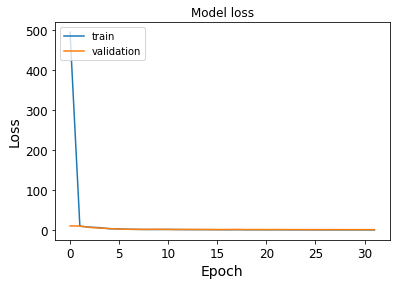

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Give your mean squared error on training including validation and testing**


In [ ]:
vgg_model_transfer_regression.evaluate(X_valid,y_valid.astype(int))

6/6 [==============================] - 1s 125ms/step - loss: 1.5516 - mse: 1.5516


[1.5516281127929688, 1.5516281127929688]

In [ ]:
vgg_model_transfer_regression.evaluate(new_img_test,ymultclass_test.astype(int))

4/4 [==============================] - 0s 97ms/step - loss: 1.3098 - mse: 1.3098


[1.3097518682479858, 1.3097518682479858]

# **Discussion on regression:**

In [ ]:
y_predict_prob = vgg_model_transfer_regression.predict(X_valid)

In [ ]:
y_predict_prob

array([[ 2.1271675 ],
       [ 2.5104272 ],
       [ 1.604735  ],
       [ 2.8259938 ],
       [ 1.7197306 ],
       [ 1.8741076 ],
       [ 1.2174324 ],
       [ 2.5074852 ],
       [ 2.1793509 ],
       [ 2.6858194 ],
       [ 2.1604962 ],
       [ 1.7810326 ],
       [ 2.9963248 ],
       [ 2.4760606 ],
       [ 0.88568836],
       [ 1.6169609 ],
       [ 1.8414001 ],
       [ 3.1761541 ],
       [ 1.7722857 ],
       [ 0.948366  ],
       [ 1.5156548 ],
       [ 2.5887372 ],
       [ 1.495822  ],
       [ 1.8117663 ],
       [ 2.4397724 ],
       [ 2.3704972 ],
       [ 3.752991  ],
       [ 3.4995995 ],
       [ 0.22438064],
       [ 2.1618333 ],
       [ 0.08051601],
       [ 2.8523955 ],
       [-0.46242508],
       [ 4.952064  ],
       [ 1.9316243 ],
       [ 1.4203727 ],
       [ 2.5596402 ],
       [ 1.5933212 ],
       [ 1.735517  ],
       [ 1.9098287 ],
       [ 2.0112007 ],
       [ 1.8491075 ],
       [ 2.1064827 ],
       [ 3.6508782 ],
       [ 2.0895393 ],
       [ 1

In [ ]:
y_predict_prob = vgg_model_transfer_regression.predict(new_img_test)

In [ ]:
y_predict_prob

array([[3.502002  ],
       [2.3004167 ],
       [2.6376626 ],
       [1.9982755 ],
       [1.8838353 ],
       [3.5711067 ],
       [3.7084439 ],
       [2.321839  ],
       [3.504917  ],
       [2.205815  ],
       [1.580038  ],
       [3.2752626 ],
       [3.6693993 ],
       [2.5633168 ],
       [2.6084282 ],
       [3.631418  ],
       [2.626799  ],
       [3.2719586 ],
       [2.9312298 ],
       [3.4512837 ],
       [0.5568494 ],
       [0.263894  ],
       [1.3975737 ],
       [1.7570772 ],
       [0.55243236],
       [1.4442153 ],
       [1.4192045 ],
       [0.892145  ],
       [0.35596052],
       [0.93720764],
       [1.6297876 ],
       [1.1729661 ],
       [2.0819461 ],
       [2.5090277 ],
       [1.465132  ],
       [1.7752328 ],
       [1.1265588 ],
       [0.9972463 ],
       [1.9092623 ],
       [1.9960258 ],
       [3.012081  ],
       [3.8893678 ],
       [2.5584986 ],
       [2.4672081 ],
       [2.7353542 ],
       [1.3045256 ],
       [1.6550832 ],
       [1.846

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ymultclass_test.astype(int), np.round(y_predict_prob)))

              precision    recall  f1-score   support

         0.0       1.00      0.10      0.18        20
         1.0       0.30      0.35      0.33        20
         2.0       0.17      0.30      0.22        20
         3.0       0.32      0.45      0.38        20
         4.0       0.55      0.30      0.39        20
         5.0       0.00      0.00      0.00         0

    accuracy                           0.30       100
   macro avg       0.39      0.25      0.25       100
weighted avg       0.47      0.30      0.30       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Regularization on classification **

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dropout
from keras import regularizers
x = vgg_model.layers[-13].output
#x =  Batch Normalization(0.1)(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
#x = Dense(10, activation='softmax')(x)
#x = MaxPooling2D(pool_size=(8, 8))(x)
#x = Conv2D(256, (1, 1),activation='relu')(x)
from keras.layers import BatchNormalization
x = Dense(2000, activation='relu')(x)
#x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(500, activation='relu',kernel_regularizer=regularizers.l2(0.004))(x)
x = Dense(250, activation='relu',kernel_regularizer=regularizers.l1(0.00008))(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer_classification_regular = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
print(vgg_model_transfer_classification_regular.summary())

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [ ]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
vgg_model_transfer_classification_regular.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer_classification_regular.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid_k))

Epoch 1/32
6/6 [==============================] - 6s 830ms/step - loss: 5.4769 - accuracy: 0.2069 - val_loss: 6.3869 - val_accuracy: 0.2056
Epoch 2/32
6/6 [==============================] - 5s 792ms/step - loss: 5.4488 - accuracy: 0.2042 - val_loss: 5.9295 - val_accuracy: 0.2111
Epoch 3/32
6/6 [==============================] - 5s 779ms/step - loss: 5.4429 - accuracy: 0.2014 - val_loss: 5.7192 - val_accuracy: 0.2167
Epoch 4/32
6/6 [==============================] - 5s 783ms/step - loss: 5.4416 - accuracy: 0.2125 - val_loss: 5.5998 - val_accuracy: 0.2167
Epoch 5/32
6/6 [==============================] - 5s 786ms/step - loss: 5.4291 - accuracy: 0.2167 - val_loss: 5.5163 - val_accuracy: 0.2278
Epoch 6/32
6/6 [==============================] - 5s 784ms/step - loss: 5.3782 - accuracy: 0.2153 - val_loss: 5.4632 - val_accuracy: 0.2333
Epoch 7/32
6/6 [==============================] - 5s 790ms/step - loss: 5.3432 - accuracy: 0.2472 - val_loss: 5.4224 - val_accuracy: 0.2389
Epoch 8/32
6/6 [====

#  print your learning curves for training and validation 

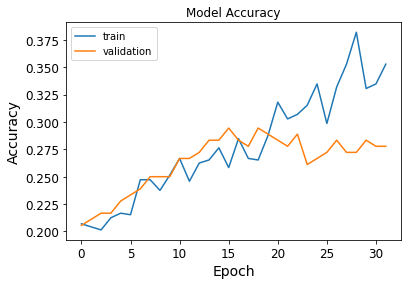

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

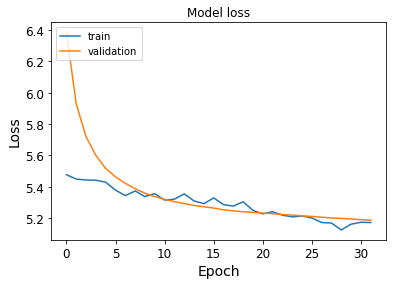

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Give the confusion matrix of your network on the training including validation**



In [ ]:
y_predict_prob = vgg_model_transfer_classification_regular.predict(X_valid)
y_predict = y_predict_prob.argmax(axis=-1)
y_valid=y_valid.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[ 9  3  4  9  6]
 [ 4  7  5 16  6]
 [ 3  6  2 17  7]
 [ 3  5  3 21  9]
 [ 2  2  4 16 11]]


discussion : the model has bad prediction in both class 2 , 3 ,4 and good prediction in class 1 and biased in class 2 to class 3 (7),,,biased in class 4 to class 3 (9) and bias in class 1 to class 2 (14)

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


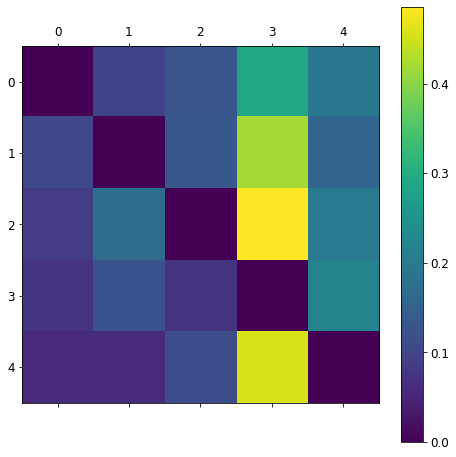

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

# **Give the confusion matrix of your network on the training including testing**

In [ ]:
y_predict_prob_test = vgg_model_transfer_classification_regular.predict(new_img_test)

In [ ]:
y_predict_test = y_predict_prob_test .argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(ymultclass_test.astype(int), y_predict_test)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[10  1  1  5  3]
 [ 8  2  1  4  5]
 [ 1  4  2 10  3]
 [ 0  2  2 11  5]
 [ 2  1  2 10  5]]


discussion: bias in class 1 to class 2 (10)

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


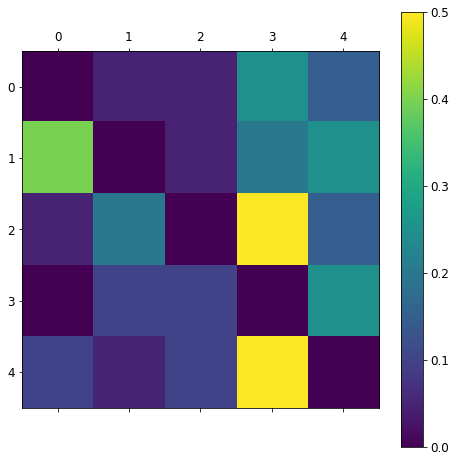

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

# **AUGMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
datagen.fit(X_train)


In [ ]:
batchSize = 128
nEpochs = 32

    
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
vgg_model_transfer_classification_regular.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer_classification_regular.fit(datagen.flow(X_train, y_train_k), epochs=nEpochs, verbose=1, 
                                 validation_data=datagen.flow(X_valid, y_valid_k))

Epoch 1/32
23/23 [==============================] - 7s 284ms/step - loss: 5.3221 - accuracy: 0.2472 - val_loss: 5.2465 - val_accuracy: 0.2500
Epoch 2/32
23/23 [==============================] - 6s 274ms/step - loss: 5.3131 - accuracy: 0.2583 - val_loss: 5.2827 - val_accuracy: 0.2167
Epoch 3/32
23/23 [==============================] - 6s 273ms/step - loss: 5.2841 - accuracy: 0.2917 - val_loss: 5.1851 - val_accuracy: 0.3000
Epoch 4/32
23/23 [==============================] - 6s 267ms/step - loss: 5.2700 - accuracy: 0.2806 - val_loss: 5.1846 - val_accuracy: 0.3111
Epoch 5/32
23/23 [==============================] - 6s 277ms/step - loss: 5.2782 - accuracy: 0.2667 - val_loss: 5.1710 - val_accuracy: 0.3056
Epoch 6/32
23/23 [==============================] - 6s 268ms/step - loss: 5.2564 - accuracy: 0.2681 - val_loss: 5.1843 - val_accuracy: 0.2889
Epoch 7/32
23/23 [==============================] - 6s 264ms/step - loss: 5.2387 - accuracy: 0.2958 - val_loss: 5.1457 - val_accuracy: 0.3278
Epoch 

#  print your learning curves for training and validation 

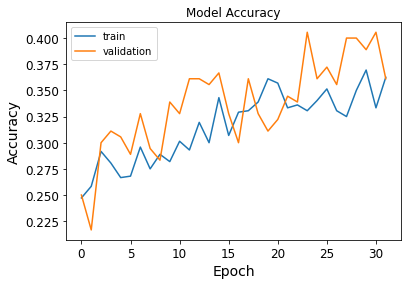

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

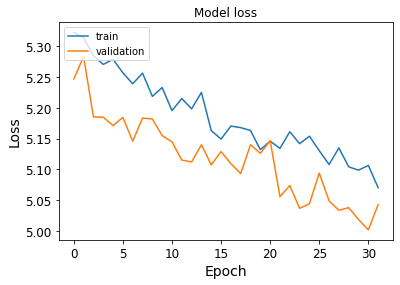

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Give the confusion matrix of your network on the training including validation**



In [ ]:
y_predict_prob = vgg_model_transfer_classification_regular.predict(X_valid)
y_predict = y_predict_prob.argmax(axis=-1)
y_valid=y_valid.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[19  3  2  4  3]
 [ 5 11  6 10  6]
 [ 5  6  4 14  6]
 [ 4  4  4 20  9]
 [ 2  1  4 12 16]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


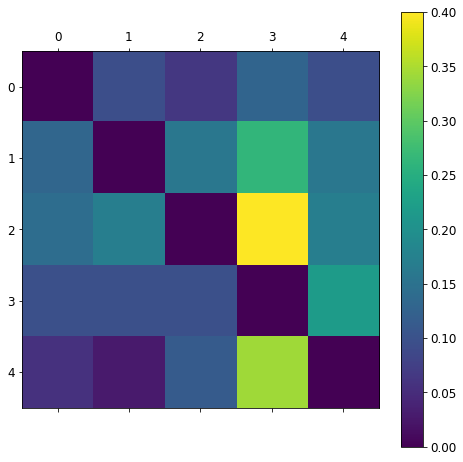

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

# **Give the confusion matrix of your network on the training including testing**

In [ ]:
y_predict_prob_test = vgg_model_transfer_classification_regular.predict(new_img_test)

In [ ]:
y_predict_test = y_predict_prob_test .argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(ymultclass_test.astype(int), y_predict_test)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[ 9  4  2  3  2]
 [ 5  5  2  5  3]
 [ 0  6  1  6  7]
 [ 2  2  1  8  7]
 [ 1  1  2  6 10]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure VGGtransfer_confusion_matrix_errors


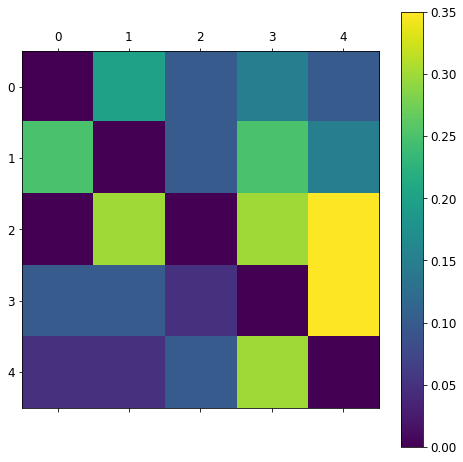

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("VGGtransfer_confusion_matrix_errors", tight_layout=False)
plt.show()

# **discussion how large a improvement can be observed from regularization and data augmentation.as classification is higher accuracy than regression**

 as the accuracy of training data decrease the overfitting also decrease so our model will have accurate prediction in expecting new data that never seen before
